In [1]:
# diabetes dataset for regression or classification: classify patients as having diabetes or not
# based on features such as patient age, sex, body mass index, average blood pressure, and six blood serum measurements 
# measured on 442 patients, and an indication of disease progression after one year

#https://blog.quantinsti.com/linear-regression-models-scikit-learn/
#https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset
#https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/


import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcdefaults()
%matplotlib inline
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.notebook_repr_html', True)

# DATAPROCESSING
In this block we are preparing the data for usage.

The dataset features has been mean-centered and scaled by the STD*N samples

In [34]:
x, y = load_diabetes(return_X_y=True)
diabetes = load_diabetes(as_frame=True)
feature_names = diabetes['feature_names']

DIABETES_VALUE = 200
PREDIABETES_VALUE = 115

print("DATA PREVIEW")
for i in range(0, 1):
  print(f"AGE:{x[i][0]}\nSEX: {x[i][1]}\nBMI: {x[i][2]}\nBP: {x[i][3]}\nTC: {x[i][4]}\nIDL: {x[i][5]}\nHDL: {x[i][6]}\nTCH: {x[i][7]}\nLTG: {x[i][8]}\nGLU: {x[i][9]}\n")

""" DIABETES CHART
               min   max   2hrs post meal
NORAML         70    99     <140
PRE-DIABETES   100   125    140-199
T2 DIABETES    >126         >200
"""

print("DATASET SHAPES")
print(f"X SHAPE: {x.shape}\nY SHAPE: {y.shape}\n")

xtrain_normal, xtest_normal, ytrain_normal, ytest_normal = train_test_split(x, y, test_size=0.2, random_state=42)

#CREATE LABELS
y_ = np.zeros(y.shape)
y_[y>=DIABETES_VALUE] = 1.
y_ = y_.astype(int)

xtrain_labeled, xtest_labeled, ytrain_labeled, ytest_labeled = train_test_split(x, y_, test_size=0.2, random_state=42)

print(f"X Train SHAPE: {xtrain_normal.shape}\nY Train SHAPE: {ytrain_normal.shape}")

min_max_scaler = MinMaxScaler(feature_range = (0,1))
xtrain_standard_labeled = np.absolute(min_max_scaler.fit_transform(xtrain_labeled))
xtest_standard_labeled = np.absolute(min_max_scaler.fit_transform(xtest_labeled))


DATA PREVIEW
AGE:0.0380759064334241
SEX: 0.0506801187398187
BMI: 0.0616962065186885
BP: 0.0218723549949558
TC: -0.0442234984244464
IDL: -0.0348207628376986
HDL: -0.0434008456520269
TCH: -0.00259226199818282
LTG: 0.0199084208763183
GLU: -0.0176461251598052

DATASET SHAPES
X SHAPE: (442, 10)
Y SHAPE: (442,)

X Train SHAPE: (353, 10)
Y Train SHAPE: (353,)


# LINEAR REGRESSION
Here we'll see how BMI & GLucose relates to diabets progression 

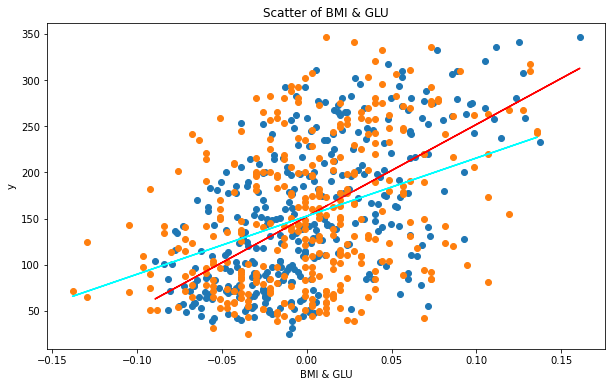

In [35]:
from sklearn.linear_model import LinearRegression

bmi = xtrain_normal[:, np.newaxis, 2]
glu = xtrain_normal[:, np.newaxis, 9]

y=ytrain_normal[:,np.newaxis]

bmi_linear_regression = LinearRegression().fit(bmi,ytrain_normal)
bmi_predicted_y = bmi_linear_regression.predict(bmi)

glu_linear_regression = LinearRegression().fit(glu,ytrain_normal)
glu_predicted_y = glu_linear_regression.predict(glu)

# plotting the regression line on the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(bmi, ytrain_normal)
plt.scatter(glu, ytrain_normal)
plt.plot(bmi, bmi_predicted_y, c='r')
plt.plot(glu, glu_predicted_y, c='cyan')
plt.title('Scatter of BMI & GLU')
plt.ylabel("y")
plt.xlabel("BMI & GLU")
plt.show()



# HELPERS

In [36]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_regression


# feature selection
def select_features(train_data, y_data, test_data, n_features = 'all', regression = True):
	score_function = f_regression
	if (regression):
		score_function = chi2

	kbest = SelectKBest(score_func=score_function, k=n_features)

	kbest.fit(train_data, y_data)

	x_train_kbest = kbest.transform(train_data)

	x_test_kbest = kbest.transform(test_data)

	return x_train_kbest, x_test_kbest, kbest

def plot_kbest_score(scores):
	# for i in range(len(scores)):
	# 	print('Feature %d: %f' % (i, scores[i]))
	plt.bar([i for i in range(len(scores))], scores)
	plt.title(f"Score value of each feature")
	plt.xlabel("Feature")
	plt.ylabel("Score")
	plt.show()

def pca_features(dataset, transform, n_features = 5):
	pca = PCA(n_components=n_features).fit(dataset)
	# APPLY PCA
	transformed = pca.transform(transform);
	return transformed, pca 

def plot_pca_variance(pca):	
	# GRAPH VARIANCE KEPT IN DATASET AGAINST X FEATURES
	plt.plot(np.cumsum(pca.explained_variance_ratio_))
	plt.title(f"PCA coverage features")
	plt.xlabel("Features")
	plt.ylabel("Coverage")
	plt.show()

def print_percent_correct(predicted, test):
  print('Percentage correct: ', 100*np.sum(predicted == test)/len(test))

def plot_matrix(title, matrix):
  cmap = ListedColormap(["darkorange", "gold", "blue", "red"])

  plt.figure()
  plt.matshow(matrix)
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      plt.text(x=j, y=i, s=matrix[i,j], va='center', ha='center')

  plt.title(title)
  plt.xlabel("Predictied")
  plt.ylabel("Actual")
  plt.show()



# FEATURE SELECTION


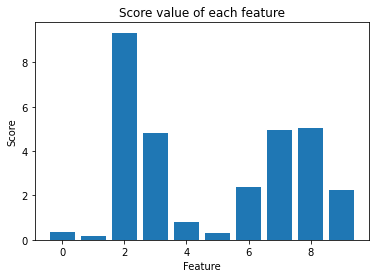

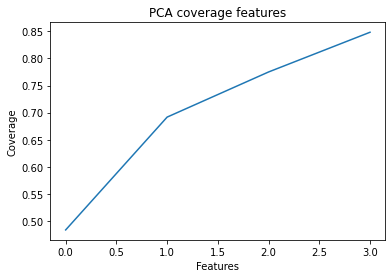

In [86]:
FEATURES = 4

# xtrain_standard_labeled
# xtrain_normal
x_trainset_features = xtrain_standard_labeled
y_trainset_features = ytrain_labeled
x_testset_features = xtest_standard_labeled

#find the most significant features from the inputs
x_train_kbest, x_test_kbest, kbest = select_features(x_trainset_features, y_trainset_features, x_testset_features, n_features=FEATURES)
plot_kbest_score(kbest.scores_)

transformed, pca = pca_features(dataset=x_trainset_features, transform=x_trainset_features, n_features=FEATURES)
x_train_pca = transformed
transformed, pca = pca_features(dataset=x_trainset_features, transform=x_testset_features, n_features=FEATURES)
x_test_pca = transformed
plot_pca_variance(pca)

# SET TRAIN TEST DATA HERE!!!!
x_train = x_train_pca
x_test = x_test_pca
y_train = ytrain_labeled
y_test = ytest_labeled


&lt;Figure size 432x288 with 0 Axes&gt;

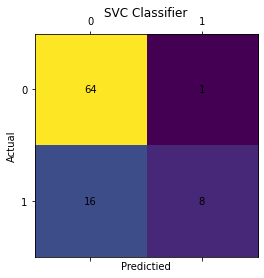

Percentage correct:  80.89887640449439


&lt;Figure size 432x288 with 0 Axes&gt;

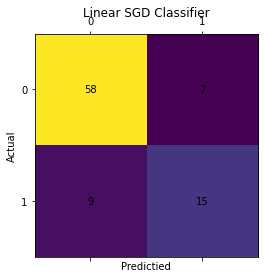

Percentage correct:  82.02247191011236


In [87]:

from sklearn.datasets import load_digits
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model
from keras.optimizers import SGD
import pandas as pd
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.linear_model import SGDClassifier



# CREATE ANN for predicting Diabetes
predicter = Sequential()
# PCA
predicter.add(Dense(units=25, activation='relu', input_dim=FEATURES, name='Input', kernel_initializer='he_uniform'))
predicter.add(Dense(units= 18, activation='relu', name='hidden'))
predicter.add(Dense(units= 15, activation='softmax', name='hidden2'))
predicter.add(Dense(units= 1, activation='tanh',name='Output'))
# kbest
# predicter.add(Dense(units=25, activation='relu', input_dim=FEATURES, name='Input', kernel_initializer='he_uniform'))
# predicter.add(Dense(units= 18, activation='relu', name='hidden'))
# predicter.add(Dense(units= 15, activation='softmax', name='hidden2'))
# predicter.add(Dense(units= 1, activation='sigmoid',name='Output'))
# - BINARY
# binary_crossentropy - 2 classes
# categorical_crossentropy - multiple classes
# hinge - -1 to 1
# squared_hinge
# - REGRESSION
# mean_squared_error
# mean_absolute_error
predicter.compile(optimizer='nadam', loss='hinge', metrics=['accuracy'])

# CONFUSION MATRIX
svc_clf = SVC(random_state=42,kernel='rbf', C=2200, gamma=0.0001)
svc_clf.fit(x_train, y_train)
y_predSVC = svc_clf.predict(x_test)
svc_clf.get_params

cm = confusion_matrix(y_true=y_test, y_pred=y_predSVC)
plot_matrix("SVC Classifier", cm)
print_percent_correct(y_predSVC, y_test)

# Linear SDG classifier using SVM(Support vector machine)
sgd_clf = SGDClassifier(random_state=42, max_iter=2000, tol=0.001)
sgd_clf.fit(x_train, y_train)
y_predSDG = sgd_clf.predict(x_test)


# Confusion SGD
cm2 = confusion_matrix(y_true=y_test, y_pred=y_predSDG)
plot_matrix("Linear SGD Classifier", cm2)
print_percent_correct(y_predSDG, y_test)

# what are scores for the features


In [88]:
history = predicter.fit(x = x_train, y=y_train, epochs=500, batch_size=90, shuffle=True,\
                    validation_data=(x_test, y_test), verbose=1)

===========================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.8414 - val_loss: 0.5676 - val_accuracy: 0.7640
Epoch 360/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8442 - val_loss: 0.5677 - val_accuracy: 0.7640
Epoch 361/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3497 - accuracy: 0.8414 - val_loss: 0.5677 - val_accuracy: 0.7640
Epoch 362/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3500 - accuracy: 0.8414 - val_loss: 0.5671 - val_accuracy: 0.7640
Epoch 363/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3504 - accuracy: 0.8442 - val_loss: 0.5668 - val_accuracy: 0.7640
Epoch 364/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8470 - val_loss: 0.5662 - val_accuracy: 0.7640
Epoch 365/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8442 - val_loss: 0.5664 - val_accuracy: 0.7640
Epoch 366/500
4/4 [================

Diabetes: 1 - Predicted: True 
Diabetes: 0 - Predicted: True 
Diabetes: 1 - Predicted: True 
Diabetes: 1 - Predicted: True 
Diabetes: 0 - Predicted: True 
Diabetes: 0 - Predicted: True 
Diabetes: 1 - Predicted: True 
Diabetes: 1 - Predicted: True 
Diabetes: 0 - Predicted: False 
Diabetes: 0 - Predicted: False 


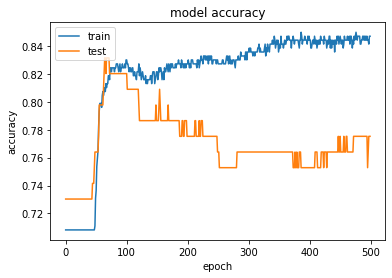

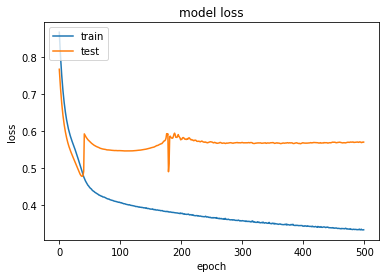

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

pr = predicter.predict(x_test)

num = 10 #len(pr)
for i in range(0, num):
  print(f"Diabetes: {y_test[i]} - Predicted: {pr[i][0]>0} ")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# We can now decide how many features we want to include in the trainint of our model

#SVM

In [85]:
 from sklearn import svm
 from sklearn import metrics


 clf = svm.SVC(kernel='linear')
 clf.fit(xtrain_,ytrain)
 y_pred = clf.predict(xtest)

print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

NameError: name &#39;xtrain_&#39; is not defined

In [416]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
# feature selection using selectKBest
fs = SelectKBest(score_func=f_regression, k=5)

fs.fit(xtrain,ytrain)

x_train_new =fs.transform(xtrain)
x_test_new = fs.transform(xtest)

# build a model to regress diseas progression

model = LinearRegression()

model.fit(x_train_new,ytrain)

ypred = model.predict(x_test_new)

# evaluate predictions
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, ypred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(ytest, ypred))





print(ytest.shape)
print(x_test_new[:,0].shape)
print(ytest.shape)
print(ypred.shape)


Coefficients: 
 [627.14976659 283.8707515   83.94582822 435.28482805  33.2813161 ]
Mean squared error: 2899.74
Coefficient of determination: 0.45
(89,)
(89,)
(89,)
(89,)


(353, 10) (353,)
(89, 10) (89,)
accuracy:  0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


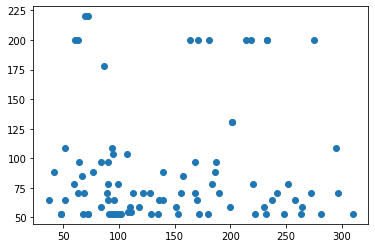

In [417]:
# build a model to classify patients
#(1) logistic regression classifier
print(xtrain_.shape, ytrain.shape)
print(xtest_.shape, ytest.shape)

model = LogisticRegression(penalty = 'l2', random_state = 0)
model.fit(xtrain_, ytrain)

#testing the classifier
ypred = model.predict(xtest_)
print('accuracy: ',accuracy_score(ytest, ypred))

cm = confusion_matrix(ytest, ypred)
print(cm)

t = np.arange(0, ytest.shape[0])
plt.figure()
plt.scatter(ytest,ypred)
plt.show()